<b>
<font size  = '5' >Team Name : Error 303</font>
<br>
<font size  = '5' >Group Members : Kshitij Parikh (B19CSE043) , Suyash Maniyar(B19EE095) & Kshitij Singh(B19ME039)</font>

<font size  = '5'> Prithvi AI Computer Vision Hackathon</font>
<br>
<font size  = '5'>Topic Name : Sample Dataset Defect Detection in Fabrics</font>

</b>

#Code1


In [ ]:
#Importing drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the necessary libraries to use inbuilt functionalities
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn import svm
from sklearn import metrics
import PIL
from PIL import Image
from numpy import asarray
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
#Reading the bad images dataset from sample images from google drive

sample_bad_dataset = []
# not sure
dataset_size = 100
rows = dataset_size


for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Sample Images/Sample Images/bad_images")):
  if (dataset_size >=0 ):
    x = os.path.join("/content/drive/MyDrive/CV Hackathon/Sample Images/Sample Images/bad_images")
    dataset_size =  dataset_size - 1
    path = os.path.join(x, file)
    img = cv2.imread(path)
    resized_image = cv2.resize(img, (140, 100)) 
    sample_bad_dataset.append(resized_image)        
  else:
    break

#Normalizing the dataset
sample_bad_dataset = np.array(sample_bad_dataset)
sample_bad_dataset.shape
sample_bad_dataset = sample_bad_dataset/255

In [ ]:
# Reshaping the data and converting into a dataframe 

sample_bad_img = []
for k in sample_bad_dataset:
  sample_bad_img.append((np.array(k)))
sample_bad_df = pd.DataFrame(np.array(sample_bad_img).reshape(rows + 1, 42000))

In [ ]:
sample_bad_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41960,41961,41962,41963,41964,41965,41966,41967,41968,41969,41970,41971,41972,41973,41974,41975,41976,41977,41978,41979,41980,41981,41982,41983,41984,41985,41986,41987,41988,41989,41990,41991,41992,41993,41994,41995,41996,41997,41998,41999
0,0.047059,0.047059,0.047059,0.184314,0.184314,0.184314,0.200000,0.200000,0.200000,0.211765,0.211765,0.211765,0.098039,0.098039,0.098039,0.078431,0.078431,0.078431,0.074510,0.074510,0.074510,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.054902,...,0.082353,0.086275,0.086275,0.086275,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.074510,0.074510,0.074510,0.137255,0.137255,0.137255,0.207843,0.207843,0.207843,0.203922,0.203922,0.203922,0.176471,0.176471,0.176471,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.066667,0.066667,0.066667
1,0.047059,0.047059,0.047059,0.184314,0.184314,0.184314,0.196078,0.196078,0.196078,0.211765,0.211765,0.211765,0.098039,0.098039,0.098039,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.066667,0.066667,0.066667,0.062745,0.062745,0.062745,0.054902,0.054902,0.054902,0.050980,0.050980,0.050980,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.054902,...,0.086275,0.086275,0.086275,0.086275,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.094118,0.094118,0.094118,0.074510,0.074510,0.074510,0.137255,0.137255,0.137255,0.196078,0.196078,0.196078,0.200000,0.200000,0.200000,0.172549,0.172549,0.172549,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.070588,0.070588,0.070588
2,0.047059,0.047059,0.047059,0.180392,0.180392,0.180392,0.203922,0.203922,0.203922,0.215686,0.215686,0.215686,0.101961,0.101961,0.101961,0.078431,0.078431,0.078431,0.070588,0.070588,0.070588,0.074510,0.074510,0.074510,0.066667,0.066667,0.066667,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.043137,0.043137,0.043137,0.050980,0.050980,0.050980,0.054902,...,0.086275,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.074510,0.074510,0.074510,0.137255,0.137255,0.137255,0.203922,0.203922,0.203922,0.203922,0.203922,0.203922,0.176471,0.176471,0.176471,0.050980,0.050980,0.050980,0.054902,0.054902,0.054902,0.062745,0.062745,0.062745,0.070588,0.070588,0.070588
3,0.047059,0.047059,0.047059,0.176471,0.176471,0.176471,0.200000,0.200000,0.200000,0.207843,0.207843,0.207843,0.105882,0.105882,0.105882,0.078431,0.078431,0.078431,0.074510,0.074510,0.074510,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.054902,...,0.086275,0.086275,0.086275,0.086275,0.098039,0.098039,0.098039,0.090196,0.090196,0.090196,0.090196,0.090196,0.090196,0.074510,0.074510,0.074510,0.141176,0.141176,0.141176,0.192157,0.192157,0.192157,0.200000,0.200000,0.200000,0.176471,0.176471,0.176471,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.066667,0.066667,0.066667
4,0.047059,0.047059,0.047059,0.172549,0.172549,0.172549,0.200000,0.200000,0.200000,0.215686,0.215686,0.215686,0.105882,0.105882,0.105882,0.078431,0.078431,0.078431,0.074510,0.074510,0.074510,0.070588,0.070588,0.070588,0.066667,0.066667,0.066667,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.058824,...,0.082353,0.090196,0.090196,0.090196,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.078431,0.078431,0.078431,0.133333,0.133333,0.133333,0.203922,0.203922,0.203922,0.203922,0.203922,0.203922,0.176471,0.176471,0.176471,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667


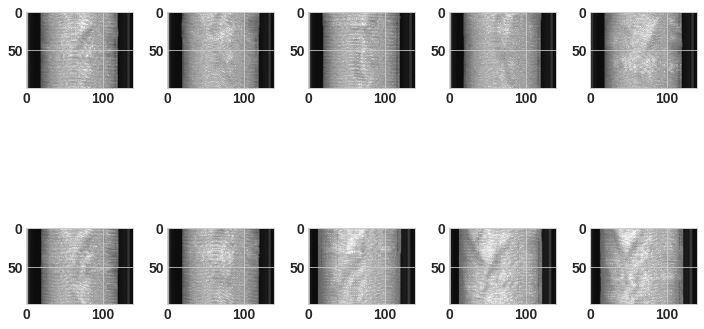

In [ ]:
# Plotting Images in the without mask dataset to understand what is available inside the dataset

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(sample_bad_dataset[k])
        k = k + 1
    plt.tight_layout()    

In [ ]:
#Reading the sample defect detection images dataset from sample images from google drive

sample_defect_detection_dataset = []
# not sure
dataset_size = 10
rows = dataset_size


for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Sample Images/Sample Images/sample_defect_detection")):
  if (dataset_size >=0 ):
    x = os.path.join("/content/drive/MyDrive/CV Hackathon/Sample Images/Sample Images/sample_defect_detection")
    dataset_size =  dataset_size - 1
    path = os.path.join(x, file)
    img = cv2.imread(path)
    resized_image = cv2.resize(img, (600, 300)) 
    sample_defect_detection_dataset.append(resized_image)        
  else:
    break

#Normalizing the dataset
sample_defect_detection_dataset = np.array(sample_defect_detection_dataset)
sample_defect_detection_dataset.shape
sample_defect_detection_dataset = sample_defect_detection_dataset/255

In [ ]:
# Reshaping the data and converting into a dataframe 

sample_defect_detection_img = []
for k in sample_defect_detection_dataset:
  sample_defect_detection_img.append((np.array(k)))
sample_defect_detection_df = pd.DataFrame(np.array(sample_defect_detection_img).reshape(rows + 1, 540000))

In [ ]:
sample_defect_detection_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,539960,539961,539962,539963,539964,539965,539966,539967,539968,539969,539970,539971,539972,539973,539974,539975,539976,539977,539978,539979,539980,539981,539982,539983,539984,539985,539986,539987,539988,539989,539990,539991,539992,539993,539994,539995,539996,539997,539998,539999
0,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.188235,0.188235,0.188235,0.200000,0.200000,0.200000,0.207843,0.207843,0.207843,0.180392,0.180392,0.180392,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.215686,0.215686,0.215686,0.203922,...,0.050980,0.05098,0.05098,0.05098,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.074510,0.074510,0.074510,0.070588,0.070588,0.070588
1,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,0.184314,0.184314,0.184314,0.203922,0.203922,0.203922,0.215686,0.215686,0.215686,0.176471,0.176471,0.176471,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.219608,0.219608,0.219608,0.207843,...,0.047059,0.05098,0.05098,0.05098,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.066667,0.066667,0.066667
2,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,0.188235,0.188235,0.188235,0.192157,0.192157,0.192157,0.203922,0.203922,0.203922,0.172549,0.172549,0.172549,0.192157,0.192157,0.192157,0.196078,0.196078,0.196078,0.223529,0.223529,0.223529,0.203922,...,0.050980,0.05098,0.05098,0.05098,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.058824,0.058824,0.058824,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
3,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,0.188235,0.188235,0.188235,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.180392,0.180392,0.180392,0.196078,0.196078,0.196078,0.200000,0.200000,0.200000,0.219608,0.219608,0.219608,0.207843,...,0.050980,0.05098,0.05098,0.05098,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588
4,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.047059,0.047059,0.047059,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,0.184314,0.184314,0.184314,0.196078,0.196078,0.196078,0.207843,0.207843,0.207843,0.184314,0.184314,0.184314,0.200000,0.200000,0.200000,0.196078,0.196078,0.196078,0.215686,0.215686,0.215686,0.203922,...,0.047059,0.05098,0.05098,0.05098,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.062745,0.062745,0.062745,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588

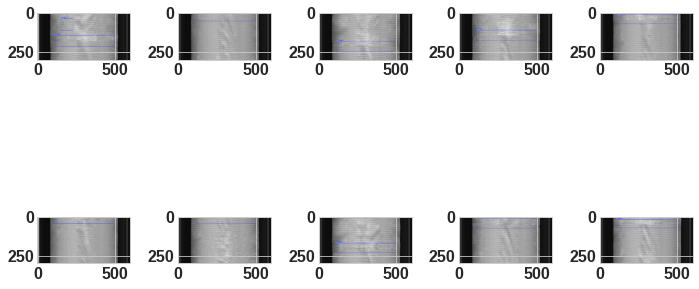

In [ ]:
# Plotting Images in the without mask dataset to understand what is available inside the dataset

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(sample_defect_detection_dataset[k])
        k = k + 1
    plt.tight_layout()    

In [ ]:
#Reading the good images dataset from sample images from google drive

sample_good_dataset = []
# not sure
dataset_size = 100
rows = dataset_size

for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Sample Images/Sample Images/good_images")):
  if (dataset_size >=0 ):
    x = os.path.join("/content/drive/MyDrive/CV Hackathon/Sample Images/Sample Images/good_images")
    dataset_size =  dataset_size - 1
    path = os.path.join(x, file)
    img = cv2.imread(path)
    resized_image = cv2.resize(img, (140, 100)) 
    sample_good_dataset.append(resized_image)        
  else:
    break

#Normalizing the dataset
sample_good_dataset = np.array(sample_good_dataset)
sample_good_dataset.shape
sample_good_dataset = sample_good_dataset/255

In [ ]:
# Reshaping the data and converting into a dataframe 

sample_good_img = []
for k in sample_good_dataset:
  sample_good_img.append((np.array(k)))
sample_good_df = pd.DataFrame(np.array(sample_good_img).reshape(rows + 1, 42000))

In [ ]:
sample_good_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41960,41961,41962,41963,41964,41965,41966,41967,41968,41969,41970,41971,41972,41973,41974,41975,41976,41977,41978,41979,41980,41981,41982,41983,41984,41985,41986,41987,41988,41989,41990,41991,41992,41993,41994,41995,41996,41997,41998,41999
0,0.047059,0.047059,0.047059,0.188235,0.188235,0.188235,0.200000,0.200000,0.200000,0.215686,0.215686,0.215686,0.098039,0.098039,0.098039,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.066667,0.066667,0.066667,0.062745,0.062745,0.062745,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.050980,0.050980,0.050980,0.047059,0.047059,0.047059,0.054902,...,0.086275,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118,0.090196,0.090196,0.090196,0.090196,0.090196,0.090196,0.078431,0.078431,0.078431,0.137255,0.137255,0.137255,0.203922,0.203922,0.203922,0.207843,0.207843,0.207843,0.168627,0.168627,0.168627,0.050980,0.050980,0.050980,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.066667,0.066667,0.066667
1,0.047059,0.047059,0.047059,0.176471,0.176471,0.176471,0.203922,0.203922,0.203922,0.215686,0.215686,0.215686,0.101961,0.101961,0.101961,0.074510,0.074510,0.074510,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.062745,0.062745,0.062745,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.054902,...,0.086275,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.090196,0.090196,0.090196,0.078431,0.078431,0.078431,0.137255,0.137255,0.137255,0.188235,0.188235,0.188235,0.200000,0.200000,0.200000,0.176471,0.176471,0.176471,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667
2,0.047059,0.047059,0.047059,0.184314,0.184314,0.184314,0.200000,0.200000,0.200000,0.211765,0.211765,0.211765,0.101961,0.101961,0.101961,0.078431,0.078431,0.078431,0.074510,0.074510,0.074510,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.054902,...,0.082353,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118,0.078431,0.078431,0.078431,0.137255,0.137255,0.137255,0.192157,0.192157,0.192157,0.207843,0.207843,0.207843,0.176471,0.176471,0.176471,0.050980,0.050980,0.050980,0.054902,0.054902,0.054902,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667
3,0.050980,0.050980,0.050980,0.180392,0.180392,0.180392,0.200000,0.200000,0.200000,0.215686,0.215686,0.215686,0.109804,0.109804,0.109804,0.078431,0.078431,0.078431,0.070588,0.070588,0.070588,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.047059,0.047059,0.047059,0.050980,0.050980,0.050980,0.058824,...,0.086275,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.098039,0.098039,0.098039,0.090196,0.090196,0.090196,0.074510,0.074510,0.074510,0.141176,0.141176,0.141176,0.203922,0.203922,0.203922,0.207843,0.207843,0.207843,0.180392,0.180392,0.180392,0.050980,0.050980,0.050980,0.054902,0.054902,0.054902,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667
4,0.050980,0.050980,0.050980,0.176471,0.176471,0.176471,0.200000,0.200000,0.200000,0.215686,0.215686,0.215686,0.105882,0.105882,0.105882,0.078431,0.078431,0.078431,0.074510,0.074510,0.074510,0.066667,0.066667,0.066667,0.062745,0.062745,0.062745,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.050980,0.050980,0.050980,0.054902,0.054902,0.054902,0.058824,...,0.086275,0.086275,0.086275,0.086275,0.101961,0.101961,0.101961,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118,0.078431,0.078431,0.078431,0.133333,0.133333,0.133333,0.172549,0.172549,0.172549,0.196078,0.196078,0.196078,0.172549,0.172549,0.172549,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.058824,0.058824,0.058824,0.070588,0.070588,0.070588


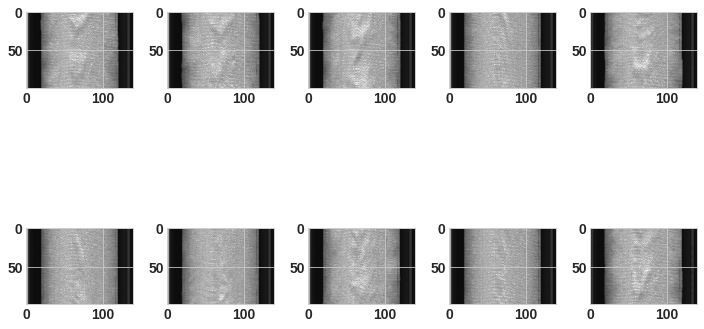

In [ ]:
# Plotting Images in sample good dataset to understand what is available inside the dataset

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(sample_good_dataset[k])
        k += 1
    plt.tight_layout()    

In [ ]:
# Shape of our image dataset
print(sample_bad_dataset[0].shape)
print(sample_good_dataset[0].shape)

(100, 140, 3)
(100, 140, 3)


In [ ]:
#Combining the sample bad and good dataset
sample_dataset = np.concatenate((sample_bad_dataset ,sample_good_dataset))
sample_df = pd.concat([sample_bad_df, sample_good_df])

In [ ]:
#Creating a label dataset , 0 for good, 1 for bad
sample_label_dataset = np.concatenate((  np.ones((rows + 1,1)), np.zeros((rows + 1,1))))
sample_label_dataset.shape

(202, 1)

In [ ]:
#Converting label dataset in dataframe for simplicity
sample_label_df = pd.DataFrame(sample_label_dataset)
sample_label_df.shape

(202, 1)

In [ ]:
#x is the feature space, y is the output
x = sample_df
y = sample_label_df

In [ ]:
x.shape

(202, 42000)

In [ ]:
y.shape

(202, 1)

# Classifiers

In [ ]:
#Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 126)

Training classifiers without dimensionality reduction

In [ ]:
# Training Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Testing Random Forest Classifier on test dataset
y_pred_rfc = rfc.predict(x_test)
accuracy_score(y_test.values.ravel() , y_pred_rfc)

0.9512195121951219

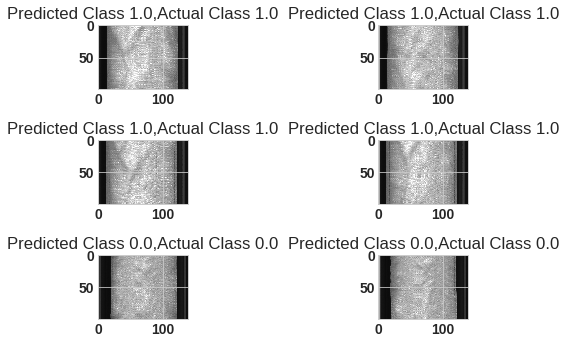

In [ ]:
correct_rfc = (y_pred_rfc == y_test.values.ravel())
correct_rfc
i = 0
for c in range(len(correct_rfc[:6])):
    plt.subplot(3,2,i+1)
    plt.imshow(np.array(x_test.iloc[c, :]).reshape(100,140,3), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_rfc[c], y_test.values.ravel()[c]))
    plt.tight_layout()
    i += 1

In [ ]:
# Training SVM classifer 
svm_classifier = svm.SVC()
svm_classifier.fit(x_train, y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Testing SVM on test dataset
y_pred_svm = svm_classifier.predict(x_test)
accuracy_score(y_test.values.ravel() , y_pred_svm)

0.9512195121951219

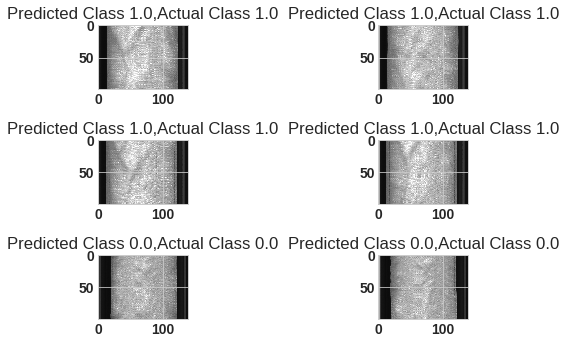

In [ ]:
correct_svm = (y_pred_svm == y_test.values.ravel())
correct_svm
i = 0
for c in range(len(correct_svm[:6])):
    plt.subplot(3,2,i+1)
    plt.imshow(np.array(x_test.iloc[c, :]).reshape(100,140,3), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_svm[c], y_test.values.ravel()[c]))
    plt.tight_layout()
    i += 1

In [ ]:
# Training MLP
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter = 201)
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=201,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Testing MLP on test dataset
y_pred_mlp = mlp.predict(x_test)
accuracy_score(y_test.values.ravel() , y_pred_mlp)

0.3902439024390244

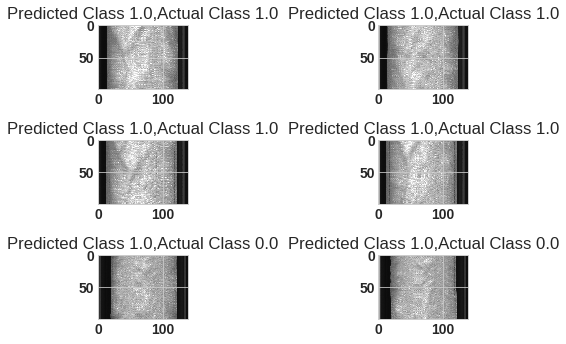

In [ ]:
correct_mlp = (y_pred_mlp == y_test.values.ravel())
correct_mlp
i = 0
for c in range(len(correct_mlp[:6])):
    plt.subplot(3,2,i+1)
    plt.imshow(np.array(x_test.iloc[c, :]).reshape(100,140,3), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_mlp[c], y_test.values.ravel()[c]))
    plt.tight_layout()
    i += 1

Training classifiers withdimensionality reduction

PCA using 90% variance was taken to avoid overfitting

In [ ]:
# Applying PCA
pca = PCA(0.90)
pca.fit(x, y)
pca_gen = pca

In [ ]:
# Training Random Forest Classifier with PCA
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(pca_gen.transform(x_train) , y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Testing Random Forest Classifier on test dataset
print(rfc.score(pca_gen.transform(x_test) , y_test.values.ravel()))

0.975609756097561


In [ ]:
# Training SVM classifer with PCA
svm_classifier = svm.SVC()
svm_classifier.fit(pca_gen.transform(x_train) , y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# # Testing SVM on test dataset with PCA
svm_classifier.score(pca_gen.transform(x_test) , y_test.values.ravel())

0.9512195121951219

In [ ]:
# Training MLP with PCA
mlp_with_pca = MLPClassifier(random_state=11, max_iter=2500, hidden_layer_sizes=(100), learning_rate_init=0.005)
mlp_with_pca = mlp_with_pca.fit(pca.transform(x_train) , y_train.values.ravel())

In [ ]:
# # Testing MLP on test dataset with PCA
print(mlp_with_pca.score(pca.transform(x_test),y_test.values.ravel()))

0.975609756097561


#***CNN Implementation for Defect Detection in Fabric***

In [ ]:
#Mask Detection using CNN as CNN generally works good for image classification
#A simple basic implementation of CNN to classify mask detection using tensorflow, keras and their inbuilt APIs

In [ ]:
#Importing the necessary libraries to use inbuilt functionalities
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
plt.rcParams['figure.figsize'] = [9,6]
plt.rcParams['font.size'] =16
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
#from torchvision import transforms
#dir(transforms)

Visualisation Example of CNN and MaxPooling

![](https://cdn-images-1.medium.com/max/1200/1*1okwhewf5KCtIPaFib4XaA.gif)

In [ ]:
x = sample_dataset
y = sample_label_dataset

NameError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 126)

In [ ]:
print(x_train.max())
print(x_test.max())

In [ ]:
# Checking the dimesions of various datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Visualisizing the size ratio of training and test dataset
ratio_circle = plt.Circle( (0,0), 0.6, color='white')
plt.pie([len(y_train),len(y_test)], labels=["Train size","Test size"], colors=['blue','red'])
p = plt.gcf()
p.gca().add_artist(ratio_circle)
plt.show()

In [ ]:
#Checking the distribution of various classes in training dataset
sns.histplot(y_train)

In [ ]:
#Checking the distribution of various classes in testing dataset
sns.histplot(y_test)

In [ ]:
#The various classes inside the mask detection data
class_names = ['good', 'bad']

In [ ]:
#Looking at some random images in mask detection dataset and their classes
rows = 4
columns = 16
fig = plt.figure(figsize=(2 * columns - 1, 2.5 * rows - 1))

for k in range(columns):
    for l in range(rows):
        rand_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, columns, k * rows + l + 1)
        value = class_names[int(y_train[rand_index][0])]
        #value = int(value)
        ax.set_title(value)
        ax.imshow(x_train[rand_index, :])
        ax.axis('off')
        ax.grid('off')
plt.show()

In [ ]:
#First 40 images in mask detection dataset
plt.figure(figsize=(16,16))
plt.title(" First 40 images in the mask detection Dataset")
for k in range(40):
    plt.xlabel(class_names[int(y_train[k][0])])
    plt.subplot(7 ,7, k + 1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train[k])  
plt;

In [ ]:
#Our CNN takes tensors of shape (image_height, image_width, color_channels)
#Intializing the architecture for CNN model having ReLU as activation function and using MaxPooling
cnn_classifier = models.Sequential()
cnn_classifier.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(140, 100, 3)))
cnn_classifier.add(layers.MaxPooling2D((2, 2)))
cnn_classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_classifier.add(layers.MaxPooling2D((2, 2)))
cnn_classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# The architecture of our CNN classifier uptil now.
cnn_classifier.summary()

In [ ]:
#Adding Dense Layers on Top to perform Classification on mask detection because Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.
cnn_classifier.add(layers.Flatten())
cnn_classifier.add(layers.Dense(64, activation='relu'))
cnn_classifier.add(layers.Dense(10))

Here's the complete architecture of our model.

In [ ]:
# The architecture of our finalised CNN classifier.
cnn_classifier.summary()

In [ ]:
# Compiling and training our CNN classifier using keras API based on accuracy and epoch = 12
cnn_classifier.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = cnn_classifier.fit(x_train , y_train, epochs = 6,  validation_data=(x_test , y_test))

### Evaluate the model

In [ ]:
#Plotting accuracy and validation accuracy vs epoch to see if we are overfitting or underfitting
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.ylim([0.25, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
test_loss_occured, test_accuracy = cnn_classifier.evaluate(x_test, y_test, verbose = 10)

In [ ]:
#Various parameters calculated during training
history.history

In [ ]:
print(cnn_classifier.metrics_names)
print(cnn_classifier.evaluate(x_test,y_test,verbose=0))

In [ ]:
print("The accuracy obtained on the test dataset is " + str(100*test_accuracy) + " %")

In [ ]:
print("The loss occured on the test dataset is " + str(test_loss_occured))

In [ ]:
losses = pd.DataFrame(history.history)

In [ ]:
losses

In [ ]:
#Plotting loss and validation loss vs epoch to see if we are overfitting or underfitting
plt.plot(losses['loss'], label = 'Loss')
plt.plot(losses['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')

In [ ]:
#Visualising how the cnn classifier is improving
epochs = [i for i in range(6)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = np.argmax(cnn_classifier.predict(x_test), axis=-1)

In [ ]:
print("The classification report containing precision recall f1-score based on each class")
print(classification_report(y_test,predictions))

In [ ]:
print("The confusion matrix for our test dataset")
confusion_matrix(y_test,predictions)

In [ ]:
#Showing an example of our cnn is working
random_image = x_test[22]
input_image = random_image.reshape(1,140,100,3)
predicted_class = np.argmax(cnn_classifier.predict(input_image), axis=-1)[0]
print(f"Actual class: {class_names[int(y_test[22][0])]} \nPredicted class: {class_names[predicted_class]}")
plt.imshow(random_image);+